## Question_1

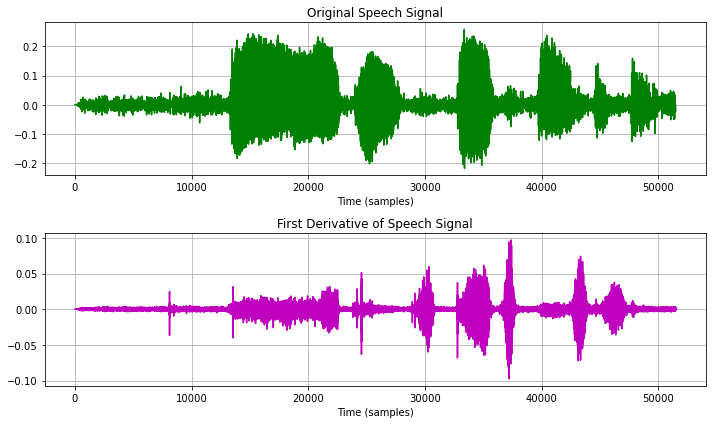

In [3]:
## 1)Findthe first derivative of your speech signal with finite differencemethod.
#Listen to the first derivative signal and the original speech signal.

import numpy as np
import matplotlib.pyplot as plt
import librosa
import sounddevice as sd

# Load the speech signal
y, sr = librosa.load(r'C:\Users\Downloads\Sem 6 LAB\AISpeechProcessing\AIvoice_lab1.opus', sr=None)
# Compute the first derivative using finite difference method
delta_f = np.zeros_like(y)
delta_f[0] = y[1] - y[0]
delta_f[-1] = y[-1] - y[-2]
for i in range(1, len(y) - 1):
    delta_f[i] = y[i-1] + y[i+1] - 2*y[i]
# Plot the original and derivative signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(y, 'g')
plt.title('Original Speech Signal')
plt.xlabel('Time (samples)')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(delta_f, 'm')
plt.title('First Derivative of Speech Signal')
plt.xlabel('Time (samples)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [20]:
# Play original speech signal
print("Original speech signal")
sd.play(y, sr)
sd.wait()

Original speech signal


In [21]:
# Play first derivative of speech signal
print("First derivative of speech signal")
sd.play(delta_f, sr)
sd.wait()

First derivative of speech signal


In [27]:
## second method for the first question

import librosa
import IPython.display as ipd
import numpy as np

# Define the filename
filename = r'C:\Users\Downloads\Sem 6 LAB\AISpeechProcessing\AIvoice_lab1.opus'

# Load and display the audio
y, sr = librosa.load(filename, sr=None)
ipd.Audio(filename)

# Compute the first derivative using finite difference method
f_d = np.array([y[1] - 2*y[0]])
for i in range(1, len(y) - 1):
    f_d = np.append(f_d, y[i-1] + y[i+1] - 2*y[i])

# Display the first derivative signal
ipd.Audio(f_d, rate=sr)


## Question 2


In [23]:

## 2)Detect the points of zero crossing in the first derivative signal. 
#Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

import numpy as np
import librosa
y, sr = librosa.load(r'C:\Users\Downloads\Sem 6 LAB\AISpeechProcessing\AIvoice_lab1.opus', sr=None)

# Compute the first derivative using finite difference method
dy_dt = np.diff(y)

# Find the points of zero crossing in the first derivative signal
zero_crossings = np.where(np.diff(np.sign(dy_dt)))[0]
speech_regions = []  
silence_regions = []

for i in range(len(zero_crossings) - 1):
    start_idx = zero_crossings[i]
    end_idx = zero_crossings[i + 1]
    region = dy_dt[start_idx:end_idx]
    if np.mean(region) > 0.1:  # Adjust the threshold based on your signal
        speech_regions.append(region)
    else:
        silence_regions.append(region)

# Calculate the average length between consecutive zero crossings in speech and silence regions
avg_length_speech = np.mean([len(region) for region in speech_regions])
avg_length_silence = np.mean([len(region) for region in silence_regions])

print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)
print("Average length between consecutive zero crossings in silence regions:", avg_length_silence)


Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 5.068445932637384


## Question_3

The length Duration of first audio file: 4.313514739229025 seconds
The length Duration of Second audio file: 4.557823129251701 seconds


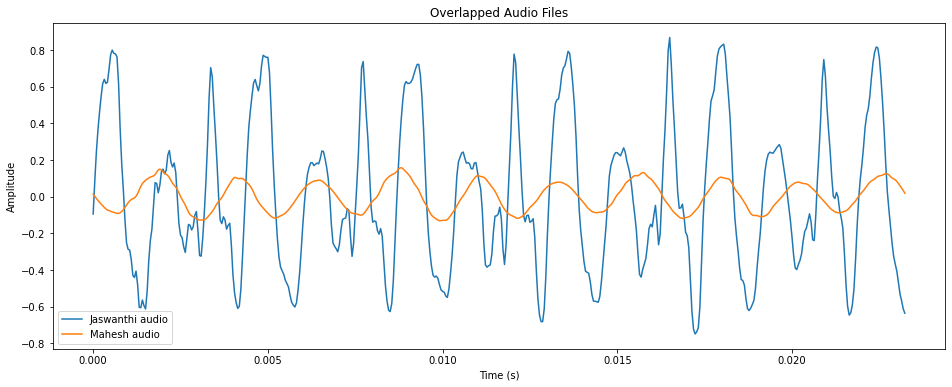

In [25]:
## 3)Speak 5 of your favoritewords. 
#Observe the length of the speech signals. Compare the lengths of your spoken words with those of your projectteam-mate.

import librosa
import numpy as np
import matplotlib.pyplot as plt

# File paths
Jaswanthi_file = r'C:\Users\Downloads\Sem 6 LAB\AISpeechProcessing\Lab_2 5Words1.opus'
Mahesh_file = r'C:\Users\Downloads\Sem 6 LAB\AISpeechProcessing\Lab_2 5Words2.opus'

# Load audio signals
y1, sr1 = librosa.load(Jaswanthi_file)
y2, sr2 = librosa.load(Mahesh_file)

# Duration of audio files
duration1 = librosa.get_duration(y=y1, sr=sr1)
duration2 = librosa.get_duration(y=y2, sr=sr2)

print("The length Duration of first audio file:", duration1, "seconds")
print("The length Duration of Second audio file:", duration2, "seconds")

# Remove silence function
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)
    return yt[0]

# Trim silence from audio signals
Jaswanthi_trimmed = remove_silence(y1, sr1)
Mahesh_trimmed = remove_silence(y2, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(Jaswanthi_trimmed) / sr1, len(Jaswanthi_trimmed))
time2 = np.linspace(0, len(Mahesh_trimmed) / sr2, len(Mahesh_trimmed))

# Plot the trimmed audio files
plt.figure(figsize=(16, 6))
plt.plot(time1, Jaswanthi_trimmed, label='Jaswanthi audio')
plt.plot(time2, Mahesh_trimmed, label='Mahesh audio')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlapped Audio Files')
plt.show()


## Question_4

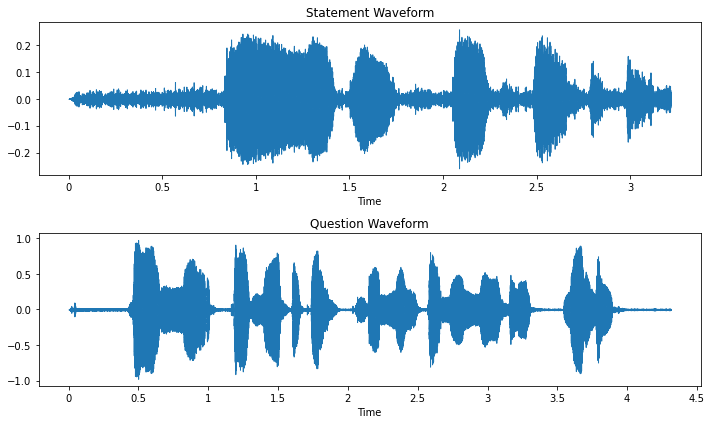

In [26]:
## 4)Select a sentence which can be used for making a statement or asking a question. Ex: “You are going to college on Sunday(./?)”.
#Record two signals –one with making the statement while other with asking question. Study the two signals and compare them.

import librosa
import librosa.display
import matplotlib.pyplot as plt
statement_file = r'C:\Users\Downloads\Sem 6 LAB\AISpeechProcessing\AIvoice_lab1.opus'# Load audio files
question_file = r'C:\Users\Downloads\Sem 6 LAB\AISpeechProcessing\Lab_2 5Words1.opus'
statement_signal, sr_statement = librosa.load(statement_file) # Load audio signals
question_signal, sr_question = librosa.load(question_file)
plt.figure(figsize=(10, 6)) # Plot waveforms
plt.subplot(2, 1, 1)
librosa.display.waveshow(statement_signal, sr=sr_statement)
plt.title('Statement Waveform')
plt.subplot(2, 1, 2)
librosa.display.waveshow(question_signal, sr=sr_question)
plt.title('Question Waveform')
plt.tight_layout()
plt.show()
